# Quiz 2: Ciencia de Datos

&emsp; **Asignatura:** Big Data. <br>
&emsp; **Profesor:** Juan Martín Londoño Zuluaga. <br>
&emsp; **Período:** 2023-I.

Usted es un o una analista de datos contratada por una prestigiosa aerolínea, FULL Stars, para el análisis de los retrasos en los vuelos de EE.UU. A esta aerolínea le importa bastante este análisis, ya que quiere basar su valor diferenciador en el mercado en el cumplimiento de los horarios de vuelo estpipulados en sus ventas. 

Bajo ese contexto, se le ha entregado una base de datos que cuenta con una amplia gana de variables, incluyendo variables de retraso en minutos de los vuelos, ciudad de origen, ciudad de destino, tiempo de vuelo, entre otros. La explicación de la base de datos la puede encontrar en la [siguiente página](https://www.kaggle.com/datasets/radheshyamkollipara/bank-customer-churn).

En ese sentido, la Junta Directiva de la aerolínea le hace las siguientes preguntas:

# 1. Importe de datos

In [5]:
import pandas as pd

bank = pd.read_csv('datain/Customer-Churn-Records.csv')
bank.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


# 2. Calidad de la base de datos

## 2.1. Número de valores perdidos

Encuentre el número de valores perdidos de la base de datos:

In [3]:
bank.isnull().sum()

RowNumber             0
CustomerId            0
Surname               0
CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64

## 2.2. Número de valores únicos

In [4]:
bank.nunique()

RowNumber             10000
CustomerId            10000
Surname                2932
CreditScore             460
Geography                 3
Gender                    2
Age                      70
Tenure                   11
Balance                6382
NumOfProducts             4
HasCrCard                 2
IsActiveMember            2
EstimatedSalary        9999
Exited                    2
Complain                  2
Satisfaction Score        5
Card Type                 4
Point Earned            785
dtype: int64

In [7]:
for val in bank.columns:
    print("="*64 + "\n" + val + "\n" + "="*64)
    print(bank[val].unique())

RowNumber
[    1     2     3 ...  9998  9999 10000]
CustomerId
[15634602 15647311 15619304 ... 15584532 15682355 15628319]
Surname
['Hargrave' 'Hill' 'Onio' ... 'Kashiwagi' 'Aldridge' 'Burbidge']
CreditScore
[619 608 502 699 850 645 822 376 501 684 528 497 476 549 635 616 653 587
 726 732 636 510 669 846 577 756 571 574 411 591 533 553 520 722 475 490
 804 582 472 465 556 834 660 776 829 637 550 698 585 788 655 601 656 725
 511 614 742 687 555 603 751 581 735 661 675 738 813 657 604 519 664 678
 757 416 665 777 543 506 493 652 750 729 646 647 808 524 769 730 515 773
 814 710 413 623 670 622 785 605 479 685 538 562 721 628 668 828 674 625
 432 770 758 795 686 789 589 461 584 579 663 682 793 691 485 650 754 535
 716 539 706 586 631 717 800 683 704 615 667 484 480 578 512 606 597 778
 514 525 715 580 807 521 759 516 711 618 643 671 689 620 676 572 695 592
 567 694 547 594 673 610 767 763 712 703 662 659 523 772 545 634 739 771
 681 544 696 766 727 693 557 531 498 651 791 733 811 707 714 7

# 3. Análisis univariado

## 3.1. Análisis de distribución

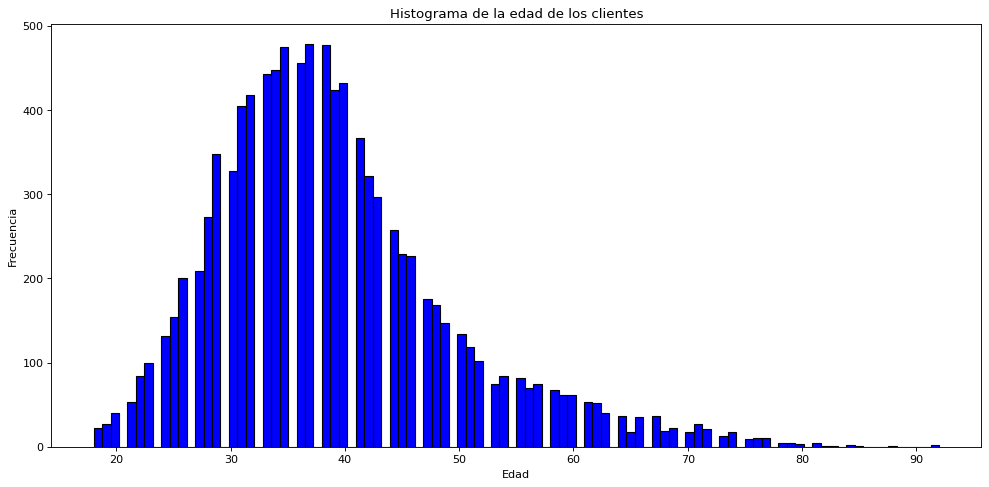

In [14]:
# Importando la librería matplotlib
import matplotlib.pyplot as plt

# Estableciendo tamaño de la gráfica
plt.figure(figsize=(15, 7), dpi = 80) 

# Generando la gráfica
plt.hist(bank['Age'], color = 'blue', edgecolor = 'black',\
        bins = int(100)) # Gráfica

# Añadiendo elementos
plt.title('Histograma de la edad de los clientes') # Título de la gráfica
plt.xlabel('Edad') # Título del eje x
plt.ylabel('Frecuencia') # Título del eje y

plt.show() # Se muestra la gráfica